Statistical **point** ***features*** is probably the most used statistics concept in data science. It is often
the first statistics technique you would apply when exploring a column of a dataset (i.e. a *random variable*)
and includes concepts such as **bias, variance, mean, median, percentiles**, and others. It’s all fairly easy to
understand and implement in code, and `pandas`'s `.describe()` dataframe API gives you most of them!

A **box (or whisker) plot** perfectly illustrates what we can do with basic statistical features of a random variable:

C:\Users\umair\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\umair\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


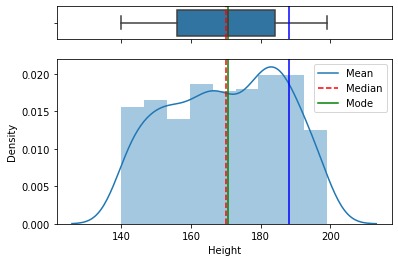

In [1]:
#from __future__ import print_function, division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

df = pd.read_csv("data/500_Person_Gender_Height_Weight_Index.csv")
df.head()

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)})
mean=df['Height'].mean()
median=df['Height'].median()
mode=df['Height'].mode()[0]

sns.boxplot(df["Height"], ax=ax_box)
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')
ax_box.axvline(mode, color='b', linestyle='-')

sns.distplot(df["Height"], ax=ax_hist)
ax_hist.axvline(mean, color='r', linestyle='--')
ax_hist.axvline(median, color='g', linestyle='-')
ax_hist.axvline(mode, color='b', linestyle='-')

plt.legend({'Mean':mean,'Median':median,'Mode':mode})

ax_box.set(xlabel='')
plt.show()

Simplest of all: same probability $y$ for all possible values of the random variable $x$. Becomes apparent when we plot a lot of experiments. I import it from a package we'll use a lot, later on. if you don't have it, then 
```(python)
pip install pymc3
```

In below though the distribution is uniform the plot looks random because the random points are taken from uniform Distribution, but the histogram follows the uniform distribution 

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


0.504193434948816
0.2876261423914534


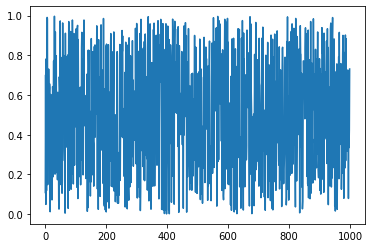

In [2]:
from pymc3 import Uniform

y = Uniform.dist()
samples = y.random(size=1000)
print(samples.mean())
print(samples.std())
plt.plot(samples)

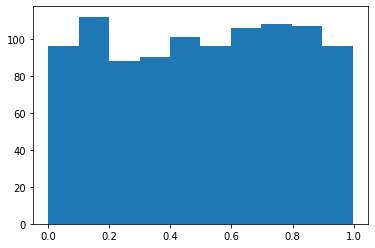

In [4]:
plt.hist(samples);

0.498342597457452
0.2903566015117295


(array([1028., 1028.,  971., 1030.,  969., 1007.,  950.,  972., 1039.,
        1006.]),
 array([1.69920454e-05, 1.00009865e-01, 2.00002739e-01, 2.99995612e-01,
        3.99988485e-01, 4.99981359e-01, 5.99974232e-01, 6.99967106e-01,
        7.99959979e-01, 8.99952852e-01, 9.99945726e-01]),
 <BarContainer object of 10 artists>)

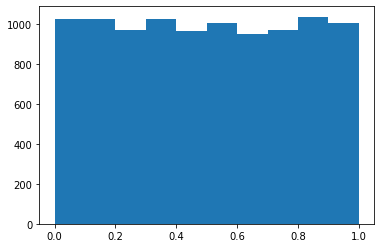

In [5]:
samples = y.random(size=10000)
print(samples.mean())
print(samples.std())
plt.hist(samples)

## The Bernoulli Distribution

Here we use `Scipy`, instead:

- A Bernoulli Distribution has only two possible outcomes and a single trial. A simple example can be a single toss of a biased/unbiased coin. In this example, the probability that the outcome might be heads can be considered equal to p and (1 - p) for tails (the probabilities of mutually exclusive events that encompass all possible outcomes needs to sum up to one).

In [6]:
import scipy.stats as stats
# size = number of experiments
# p = probability of success
bern = stats.bernoulli.rvs(size=10000,p=0.5)

C:\Users\umair\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, 'Bernoulli Distribution'), Text(0, 0.5, 'Frequency')]

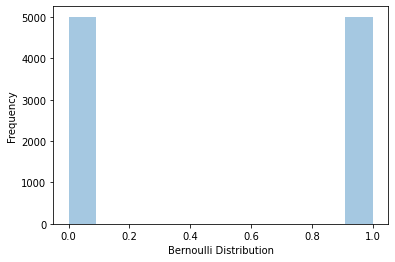

In [7]:
ax= sns.distplot(bern,
                 kde=False)
ax.set(xlabel='Bernoulli Distribution', ylabel='Frequency')

[Text(0.5, 0, 'Bernoulli Distribution'), Text(0, 0.5, 'Frequency')]

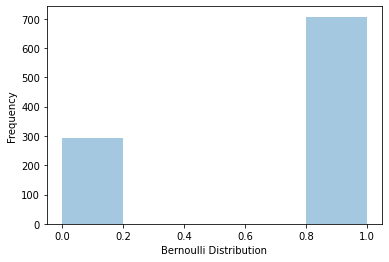

In [8]:
biased_bern = stats.bernoulli.rvs(size=1000,p=0.7)

ax= sns.distplot(biased_bern,
                 kde=False)
ax.set(xlabel='Bernoulli Distribution', ylabel='Frequency')

## The binomial Distribution

The Binomial Distribution can be thought as the sum of outcomes of an event following a Bernoulli distribution. It takes two parameters as inputs: the number of times on event takes place and the probability assigned to one of the two classes.

The probability of getting exactly k successes in n independent Bernoulli trials is given by: 

$$p(k,n,p) = (^n_k) p^k (1-p)^{n-k}$$

where

$$(^n_k) = \frac{n!}{k!\;(n-k)!}$$

The probability of getting exactly k successes in n independent Bernoulli trials can be plotted:

<AxesSubplot:ylabel='Frequency'>

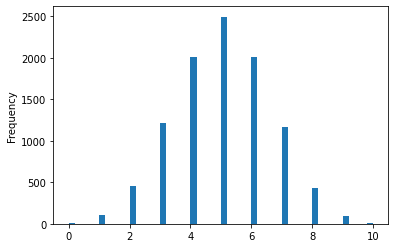

In [9]:
# size = number of experiments
# n = number of trials (number of trials for each experiment)
# p = probability that one of two events is going to take place
binomial_data = stats.binom.rvs(size=10000, n=10, p=0.5, random_state=0)
pd.Series(binomial_data).plot(kind="hist", bins = 50)

So for n=10 and p=0.5, the probably of 5 successes is the highest, and the distribution of the number of successes is very gaussian-like!

Changing the probability value changes how the distribution looks like.

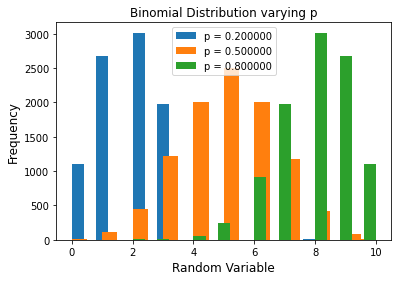

In [10]:
for prob in range(2, 10, 3):
    binomial_data = stats.binom.rvs(size=10000, n=10, p=0.1*prob, 
                                    random_state=0)
    
    pd.Series(binomial_data).plot(kind="hist", bins = 20, 
                              label="p = {:f}".format(0.1*prob))
    plt.xlabel('Random Variable', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.title("Binomial Distribution varying p")
    plt.legend()

## The Normal Distribution

</br >

Also known as the **gaussian** distribution.

For ***continuous random variables***:

$$X \in [0,1]$$

$$Y \in (-\infty, \infty)$$

Its **probability *density* function** (pdf): 

For continuous $X$,

$$Pr(x \le X \le x + dx) = f(x|\theta)dx \, \text{ as } \, dx \rightarrow 0$$

![Continuous variable](https://upload.wikimedia.org/wikipedia/commons/7/74/Normal_Distribution_PDF.svg)

<div style="font-size: 110%;">  
$$f(x) = \frac{1}{\sqrt{2\pi\sigma^2}}\exp\left[-\frac{(x-\mu)^2}{2\sigma^2}\right]$$
</div>

* $X \in \mathbf{R}$
* $\mu \in \mathbf{R}$
* $\sigma>0$

The **expectation** (or first moment), and the **standard deviation** (or second moment) of a gaussian are:
$$\begin{align}E(X) &= \mu \cr
\text{Var}(X) &= \sigma^2 \end{align}$$

-2.0087314707993817
4.018323711273988


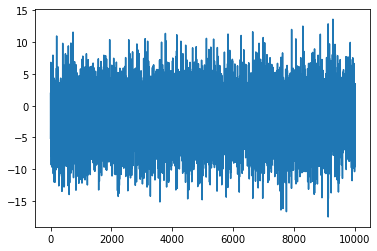

In [13]:
from pymc3 import Normal

y = Normal.dist(mu=-2, sd=4)
samples = y.random(size=10000)
print(samples.mean())
print(samples.std())
plt.plot(samples);

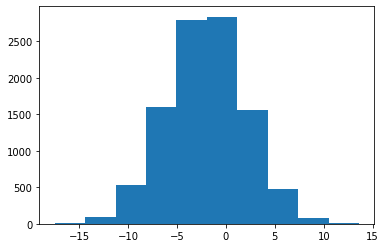

In [14]:

plt.hist(samples);

C:\Users\umair\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


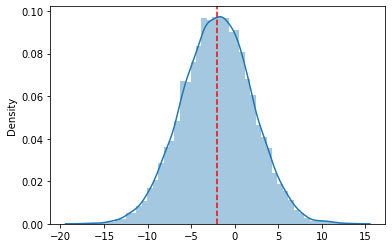

In [15]:
%matplotlib inline
sns.distplot(samples)
plt.axvline(samples.mean(), color='r', linestyle='--')

<AxesSubplot:ylabel='Frequency'>

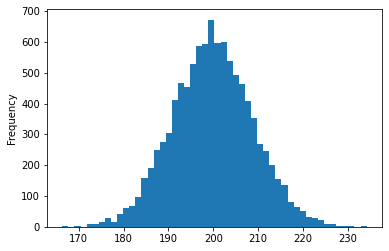

In [16]:
# size = number of data points
# loc = mean
# scale = standard deviation
normal_dist = stats.norm.rvs(size=10000, loc=200, scale=9, 
                             random_state=0) 

pd.Series(normal_dist).plot(kind="hist", bins=50)

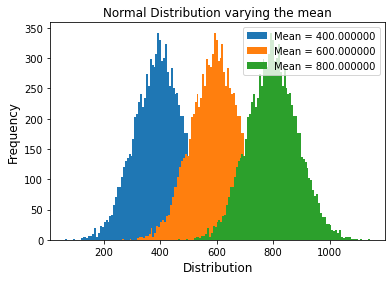

In [17]:
#for different means
for mean in range(400, 900, 200):
    normal_dist = stats.norm.rvs(size=10000, loc=mean, scale=90, 
                             random_state=0) 
    pd.Series(normal_dist).plot(kind="hist", bins=100, 
                                label="Mean = {:f}".format(mean))
    plt.xlabel('Distribution', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.title("Normal Distribution varying the mean")
    plt.legend()


# pdf, cdf, ppf

A [probability density function](https://en.wikipedia.org/wiki/Probability_density_function) (pdf) gives us the probability of a random variable assuming a certain value ($y$ from $x$). 

It's the extension of our `p` function to infinite dictionaries :-)

Let's plot the $y$s of the normal distribution, for many $x$s:

In [19]:
stats.norm.pdf(x=168,         # Value to check for the random variable
               loc=174,       # mean
               scale=8.2)     # standard deviation

0.03722515686677741

In [20]:
stats.norm.pdf(x=174,         # Value to check for the random variable
               loc=174,       # mean
               scale=8.2)     # standard deviation

0.04865149760993082

Renormalizing the random variates

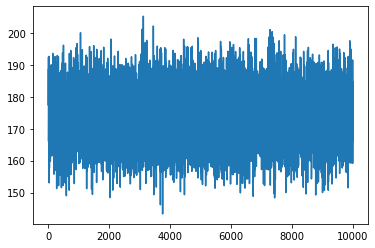

In [21]:
normal_dist = stats.norm.rvs(size=10000, loc=174, scale=8.2, 
                             random_state=0) 

f = pd.Series(normal_dist).plot()

In [22]:
from sklearn import preprocessing
normal_dist_scaled = preprocessing.MinMaxScaler().fit_transform(pd.DataFrame(normal_dist, columns=['Score']))
normal_dist_scaled.shape

(10000, 1)

In [23]:
np.squeeze(normal_dist_scaled).shape

(10000,)

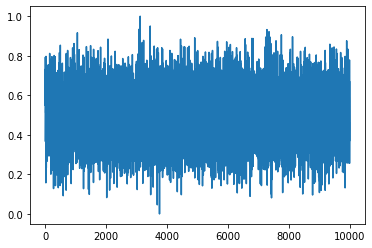

In [24]:
f = pd.Series(np.squeeze(normal_dist_scaled)).plot()

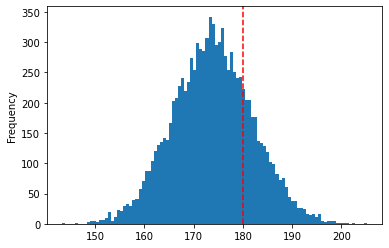

In [25]:
f = pd.Series(normal_dist).plot(kind="hist", bins=100)
f.axvline(180, color='r', linestyle='--')

 Boston Housing model 

In [26]:
from sklearn.datasets import load_boston

boston = load_boston()
x = boston['data']
y = boston['target']
cols = boston['feature_names']

df = pd.DataFrame(x, columns = cols)
df['Price'] = y
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [27]:
df['CRIM'].skew()

5.223148798243851

Let's use the Seaborn library to make a histogram alongside with the KDE plot.

C:\Users\umair\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CRIM', ylabel='Density'>

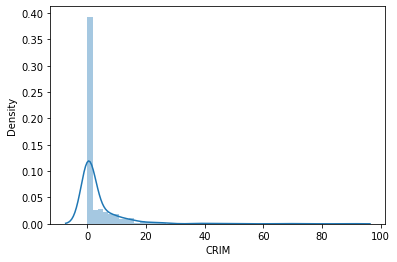

In [28]:
sns.distplot(df['CRIM'])

Let’s explore some methods for handling *skewed* data.

## Log Transform
Log transformation is most likely the first thing we should do to remove skewness from the predictor.
It can be easily done via `Numpy`, just by calling the log() function on the desired column

In [30]:
crim_log = np.log(df['CRIM'])
crim_log.skew()

0.4059344988496048

C:\Users\umair\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CRIM', ylabel='Density'>

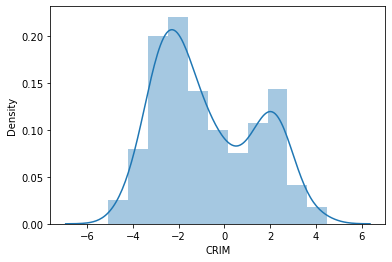

In [31]:
sns.distplot(crim_log)

The distribution is pretty much the same, but the range is smaller, as expected.

## Box-Cox Transform
The [Box-Cox transform](https://en.wikipedia.org/wiki/Power_transform#Box%E2%80%93Cox_transformation), named after statisticians [George Box](http://mathshistory.st-andrews.ac.uk/Biographies/Box.html) and [Sir David Roxbee Cox](https://www.britannica.com/biography/David-Cox-British-statistician) who collaborated on a 1964 paper and developed the technique, is the classical way for handling skewed data. To use it, your data must be positive — so that can be a bummer sometimes.

At the core of the Box Cox transformation is an exponent, $λ$, which varies from -5 to 5. All values of $λ$ are considered and the optimal value for your data is selected; The *optimal value* is the one which results in the best approximation of a normal distribution curve.

You can import the Box-Cox transform from `Scipy`, but the check for the skew you’ll need to convert the resulting Numpy array to a Pandas Series:

In [33]:
from scipy import stats

crim_boxcox = stats.boxcox(df['CRIM'])[0]
pd.Series(crim_boxcox).skew()

0.09364917268984103

C:\Users\umair\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

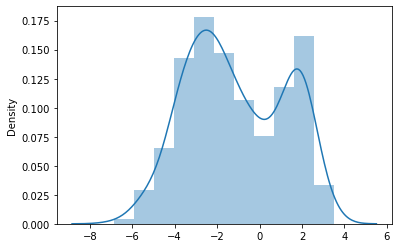

In [34]:
sns.distplot(crim_boxcox)